In [68]:
#Importing libraries
import torch
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
%matplotlib inline
import torchvision.transforms as transforms 
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F

In [3]:
#Downloading the dataset
datas = MNIST(root="data/", download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
len(datas)

60000

our dataset contains 60000 images for training the model.

In [5]:
#Let's create a test data set.
test_datas = MNIST(root="data/", train=False)
len(test_datas)

10000

We have created a test dataset that contains 10000 images

In [6]:
datas[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FA420792FD0>, 5)

Label: 5


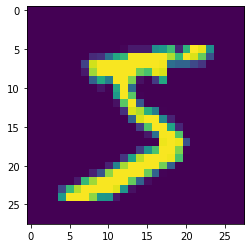

In [13]:
#Visualizing the images in training set
image, label = datas[0]
plt.imshow(image)
print("Label:", label)

Label: 1


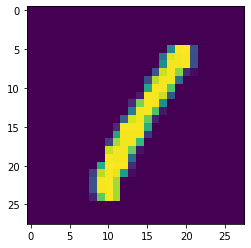

In [14]:
image, label = datas[3]
plt.imshow(image)
print("Label:", label)

**Pytorch cannot understand or recognise images, hence we need to convert them into tensor.**

In [22]:
datas = MNIST(root="data/", train=True,
              transform=transforms.ToTensor())

In [23]:
image_tensor, label = datas[0]
print(image_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [27]:
print(image_tensor[0:, 12:16, 13:16])
print(torch.max(image_tensor), torch,min(image_tensor))

tensor([[[0.9922, 0.2745, 0.0000],
         [0.9451, 0.8824, 0.6275],
         [0.3176, 0.9412, 0.9922],
         [0.0000, 0.1765, 0.7294]]])
tensor(1.) <module 'torch' from '/usr/local/lib/python3.7/dist-packages/torch/__init__.py'> tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
 

This image has values from 0 to 1 where 0 represents black and 1 represents white

Label: 5


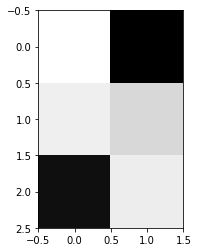

In [32]:
#Visualizing the tensor
plt.imshow(image_tensor[0,12:15, 13:15], cmap = "gray")
print("Label:", label)

**SPLITTING THE DATASET INTO TRAINING, VALIDATION AND TEST SET**

MNIST dataset contains 10000 test dataset, hence we are going to split the 60000 training dataset for generating validation set

In [37]:
train_set, val_set = random_split(datas, [50000, 10000])

It's very important to choose a random sample for training and validation set, otherwise our model wouldn't be able to make useful predictions. 

Inorder to get random sample, we are going to import dataloader

In [42]:
batch_size = 130
train_loader = DataLoader(train_set, batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size)

**TRAINING MODEL**

In [46]:
input_size = 28 * 28
output_size = 10

#Logistic regression model
model = nn.Linear(input_size, output_size)
#print shape of weight parameter
model.weight.shape

torch.Size([10, 784])

In [48]:
model.bias.shape     #print shape of bias parameter

torch.Size([10])

In [72]:
for image, label in train_loader:
  print("label")
  print(image.shape)
  outputs=model(image)
  print(outputs)
  break

label
torch.Size([130, 1, 28, 28])


UnboundLocalError: ignored

In [51]:
images.shape

torch.Size([130, 1, 28, 28])

Define a class to define a custom model by extending the nn.Module class from PyTorch.

In [76]:
class Extendmodule(nn.Module):
  def __init__(self):
    super().__init__()     
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):    
        x = x.reshape(-1, 784)
        out = self.linear(x)
        return out
    
model = Extendmodule()


In [79]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [77]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())


torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0340, -0.0098,  0.0089,  ..., -0.0133, -0.0202, -0.0209],
         [ 0.0184,  0.0142, -0.0297,  ..., -0.0187, -0.0304, -0.0027],
         [-0.0179, -0.0041,  0.0260,  ..., -0.0169, -0.0052, -0.0291],
         ...,
         [-0.0288, -0.0337, -0.0265,  ...,  0.0322,  0.0126,  0.0188],
         [-0.0087, -0.0246, -0.0158,  ...,  0.0003,  0.0132,  0.0020],
         [ 0.0345, -0.0217, -0.0011,  ...,  0.0214, -0.0101,  0.0235]],
        requires_grad=True), Parameter containing:
 tensor([-0.0140, -0.0344,  0.0101,  0.0106, -0.0039, -0.0117, -0.0302, -0.0322,
          0.0216,  0.0161], requires_grad=True)]

In [80]:
for images, labels in train_loader:
  print("label")
  print(images.shape)
  outputs=model(images)
  print(outputs)
  break

  print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

label
torch.Size([130, 1, 28, 28])
tensor([[-0.5405,  0.0022,  0.1927,  ...,  0.0748,  0.0969, -0.1349],
        [-0.0547, -0.1696,  0.1366,  ...,  0.0569, -0.0750, -0.2860],
        [-0.2323, -0.1309,  0.0901,  ..., -0.0926,  0.0776,  0.0357],
        ...,
        [-0.0704,  0.1848, -0.4663,  ...,  0.1437, -0.1689, -0.0809],
        [ 0.0494, -0.1167, -0.1648,  ...,  0.0464, -0.0522, -0.1182],
        [-0.1570,  0.0342, -0.0734,  ..., -0.3079, -0.1700, -0.0677]],
       grad_fn=<AddmmBackward0>)
Sample outputs :
 tensor([[-0.5405,  0.0022,  0.1927,  0.0422, -0.0029, -0.1692,  0.0596,  0.0748,
          0.0969, -0.1349],
        [-0.0547, -0.1696,  0.1366,  0.0106,  0.0598, -0.2947, -0.0078,  0.0569,
         -0.0750, -0.2860]])


CONVERT OUTPUT ROWS INTO PROBABILITIES

In [81]:
outputs[:2]

tensor([[-0.5405,  0.0022,  0.1927,  0.0422, -0.0029, -0.1692,  0.0596,  0.0748,
          0.0969, -0.1349],
        [-0.0547, -0.1696,  0.1366,  0.0106,  0.0598, -0.2947, -0.0078,  0.0569,
         -0.0750, -0.2860]], grad_fn=<SliceBackward0>)

In [84]:
#use softmax function f
#apply softmax on earch output row

probability = F.softmax(outputs, dim=1)
#print some probabilities
print("probabilities", probability[:2].data)

#Add up probabilities
print("Sum: ", torch.sum(probability[0]).item())


probabilities tensor([[0.0595, 0.1023, 0.1238, 0.1065, 0.1018, 0.0862, 0.1084, 0.1100, 0.1125,
         0.0892],
        [0.0998, 0.0890, 0.1209, 0.1066, 0.1119, 0.0785, 0.1046, 0.1116, 0.0978,
         0.0792]])
Sum:  1.0


predictions

In [85]:
max_probability, prediction = torch.max(probability, dim=1)
print(prediction)
print(max_probability)

tensor([2, 2, 2, 2, 7, 6, 8, 2, 7, 2, 1, 1, 2, 3, 2, 2, 3, 8, 2, 8, 1, 2, 4, 3,
        3, 7, 7, 3, 2, 7, 8, 7, 6, 2, 3, 7, 1, 8, 2, 7, 3, 3, 7, 6, 7, 7, 7, 7,
        7, 1, 4, 4, 2, 3, 1, 8, 2, 7, 2, 3, 6, 2, 3, 7, 3, 3, 3, 2, 7, 2, 3, 2,
        3, 1, 3, 4, 3, 2, 3, 2, 2, 9, 2, 8, 7, 2, 3, 3, 3, 2, 3, 8, 7, 7, 8, 3,
        2, 2, 8, 3, 7, 3, 7, 8, 3, 2, 3, 2, 7, 2, 6, 7, 2, 2, 6, 2, 7, 3, 1, 3,
        7, 3, 7, 1, 8, 1, 2, 1, 3, 3])
tensor([0.1238, 0.1209, 0.1139, 0.1197, 0.1167, 0.1264, 0.1286, 0.1447, 0.1373,
        0.1279, 0.1246, 0.1474, 0.1105, 0.1194, 0.1217, 0.1256, 0.1273, 0.1235,
        0.1253, 0.1176, 0.1371, 0.1351, 0.1220, 0.1171, 0.1305, 0.1211, 0.1266,
        0.1207, 0.1534, 0.1347, 0.1375, 0.1210, 0.1191, 0.1275, 0.1259, 0.1302,
        0.1402, 0.1244, 0.1307, 0.1168, 0.1404, 0.1203, 0.1443, 0.1234, 0.1338,
        0.1392, 0.1323, 0.1224, 0.1371, 0.1302, 0.1181, 0.1307, 0.1450, 0.1298,
        0.1528, 0.1179, 0.1332, 0.1198, 0.1561, 0.1445, 0.1258, 0.1271, 0.1256,
 

In [87]:
print(label)  #compare with actual labels

tensor([1, 8, 8, 7, 8, 0, 3, 4, 2, 0, 2, 0, 0, 3, 6, 4, 7, 6, 2, 5, 2, 1, 5, 2,
        0, 9, 0, 7, 6, 8, 4, 1, 9, 5, 6, 6, 6, 3, 5, 0, 5, 4, 9, 5, 4, 7, 2, 9,
        5, 3, 1, 3, 4, 9, 6, 1, 9, 4, 2, 9, 6, 6, 1, 0, 8, 5, 7, 8, 0, 5, 3, 0,
        0, 8, 6, 6, 9, 0, 0, 0, 9, 7, 9, 9, 2, 5, 3, 3, 1, 9, 2, 1, 8, 7, 5, 6,
        9, 5, 5, 5, 3, 1, 1, 4, 8, 1, 1, 9, 4, 5, 8, 6, 4, 8, 0, 2, 4, 2, 2, 1,
        8, 2, 6, 1, 9, 7, 7, 8, 2, 7])


Our predicted label is different from actual label .Let's train the model. In order to find out "how good our model is performing?" we will calculate accuracy

:

In [88]:
outputs[:2]

tensor([[-0.5405,  0.0022,  0.1927,  0.0422, -0.0029, -0.1692,  0.0596,  0.0748,
          0.0969, -0.1349],
        [-0.0547, -0.1696,  0.1366,  0.0106,  0.0598, -0.2947, -0.0078,  0.0569,
         -0.0750, -0.2860]], grad_fn=<SliceBackward0>)

Calculate accuracy and probability

In [89]:
def accuracy(outputs, labels):
  _, predictions = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(predictions==label).item() / len(prediction))

In [90]:
accuracy(outputs, labels)

tensor(0.0615)

In [92]:
probability

tensor([[0.0595, 0.1023, 0.1238,  ..., 0.1100, 0.1125, 0.0892],
        [0.0998, 0.0890, 0.1209,  ..., 0.1116, 0.0978, 0.0792],
        [0.0825, 0.0913, 0.1139,  ..., 0.0949, 0.1125, 0.1079],
        ...,
        [0.1002, 0.1293, 0.0674,  ..., 0.1241, 0.0908, 0.0991],
        [0.1093, 0.0926, 0.0883,  ..., 0.1090, 0.0988, 0.0925],
        [0.0946, 0.1146, 0.1029,  ..., 0.0814, 0.0934, 0.1035]],
       grad_fn=<SoftmaxBackward0>)

*We cannot use "Accuracy" as a loss function for optimizing our model using gradient descents* hence we use cross entropy function

In [93]:
loss_fn = F.cross_entropy
loss = loss_fn(outputs,labels)

In [94]:
loss

tensor(2.3144, grad_fn=<NllLossBackward0>)

Train the model

In [95]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

Evaluate function for validation phase

In [96]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

Redifine the extendmodule

In [103]:
class Extendmodule(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
        x = x.reshape(-1, 784)
        out = self.linear(x)
        return out

  def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

  def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

  def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
  def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = Extendmodule()

Let's calculate accuracy for model performs on the validation set with the initial set of randomly initialized weights & biases.

In [104]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.059040967375040054, 'val_loss': 2.3485422134399414}

The intial accuracy is a=5%


train model for 5 epochs

In [109]:
train1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6611, val_acc: 0.8578
Epoch [1], val_loss: 0.6497, val_acc: 0.8581
Epoch [2], val_loss: 0.6391, val_acc: 0.8589
Epoch [3], val_loss: 0.6291, val_acc: 0.8598
Epoch [4], val_loss: 0.6199, val_acc: 0.8609


In [110]:
train2 = fit(5, 0.001, model, train_loader, val_loader)


Epoch [0], val_loss: 0.6113, val_acc: 0.8624
Epoch [1], val_loss: 0.6032, val_acc: 0.8639
Epoch [2], val_loss: 0.5955, val_acc: 0.8650
Epoch [3], val_loss: 0.5884, val_acc: 0.8660
Epoch [4], val_loss: 0.5816, val_acc: 0.8672


In [111]:
train3 = fit(5, 0.001, model, train_loader, val_loader)


Epoch [0], val_loss: 0.5752, val_acc: 0.8678
Epoch [1], val_loss: 0.5691, val_acc: 0.8685
Epoch [2], val_loss: 0.5634, val_acc: 0.8689
Epoch [3], val_loss: 0.5579, val_acc: 0.8695
Epoch [4], val_loss: 0.5527, val_acc: 0.8705


In [116]:
train4 = fit(5, 0.001, model, train_loader, val_loader)


Epoch [0], val_loss: 0.5234, val_acc: 0.8743
Epoch [1], val_loss: 0.5196, val_acc: 0.8748
Epoch [2], val_loss: 0.5160, val_acc: 0.8751
Epoch [3], val_loss: 0.5126, val_acc: 0.8753
Epoch [4], val_loss: 0.5093, val_acc: 0.8760


We have attained an accuracy of 87% and training loss has reduced to 0.50.Let's try to visualize it

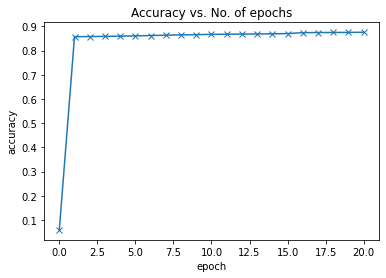

In [117]:
train_result = [result0] + train1 + train2 + train3 + train4
accuracies = [result['val_acc'] for result in train_result]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

TESTING

In [118]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

In [120]:
#Let's define a function that can return predicted label for a single image tensor
def predict_test(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


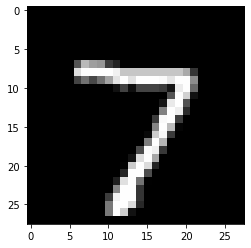

In [121]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_test(img, model))

Label: 9 , Predicted: 9


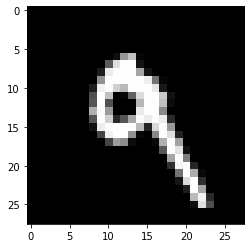

In [126]:
img, label = test_dataset[7]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_test(img, model))

Label: 0 , Predicted: 6


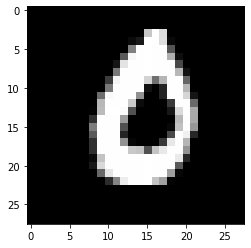

In [128]:
img, label = test_dataset[1121]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_test(img, model))

CONCLUSION

Finally, We found that our model is not accurate. Our model predicted "0" as "6" is because it's almost similar and our model couldn't differentiate it. So inorder to improve the performance of the model we need to train them with large complex datasets and should try different hyper parameters and optimization techniques. 





CONCLUSION

